## 1. Perceptron Basics ##

- A perceptron is a simple model for binary classification that computes a weighted sum of inputs and applies an activation function. It mimics the behavior of a biological neuron and is one of the simplest forms of artificial neural networks.

- Set a threshold value --> Multiply all inputs with its weights --> Sum all the results --> Activate the output

**Perceptron Learning**

- During training, the perceptron adjusts its weights based on observed errors. This is typically done using a learning algorithm such as the perceptron learning rule or a backpropagation algorithm.

- The learning process presents the perceptron with labeled examples, where the desired output is known. The perceptron compares its output with the desired output and adjusts its weights accordingly, aiming to minimize the error between the predicted and desired outputs.

- The learning process allows the perceptron to learn the weights that enable it to make accurate predictions for new, unknown inputs.



In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training process
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = [self.activation_function(x) for x in linear_output]
        return np.array(y_predicted)

# Example usage
if __name__ == "__main__":
    # Sample dataset (AND logic gate)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND outputs

    # Create a Perceptron instance and train it
    perceptron = Perceptron(learning_rate=0.1, n_iter=10)
    perceptron.fit(X, y)

    # Make predictions
    predictions = perceptron.predict(X)
    print("Predictions:", predictions)

Predictions: [0 0 0 1]


## 2. Gradient descent and cost function ##

- Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible. The general formula is  θ = θ - α∇J(θ), where α is the learning rate and ∇J(θ) is the gradient of the loss function. (∇ = gradient, J(θ) = loss function)

- refer to Machine Learning.ipynb for python implementation

- The cost function (or loss function) quantifies how well the model's predictions match the actual data. Common examples include Mean Squared Error (MSE) for regression and Cross-Entropy Loss for classification.


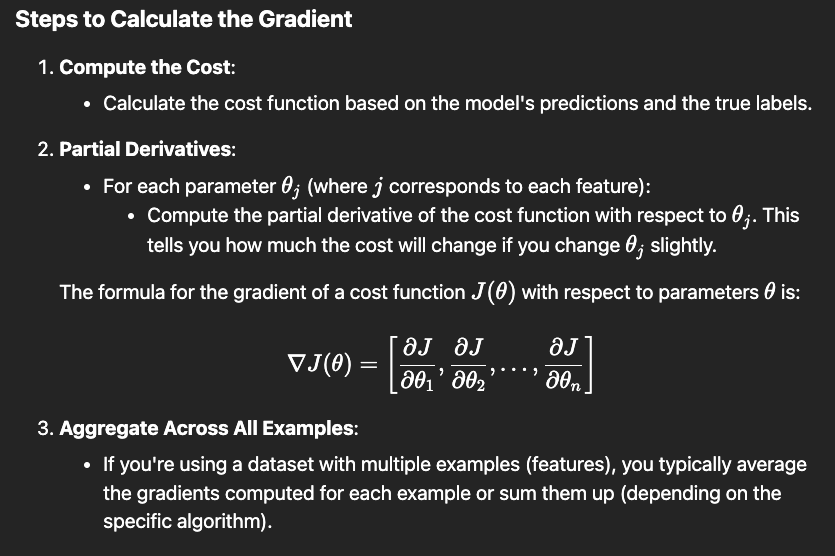

- A negative gradient indicates that the weight should be higher that it actually is right now, so the current weight should increase. Using the formula θ(new) = θ(old) - α∇J(θ), when ∇J(θ) is negative, θ(new) will increase.

## 3. Feedforward and Backpropagation ##

- In the feedforward pass, the neural network processes input data by passing it through each layer. The inputs (or activations) are multiplied by the corresponding weights, and biases are added at each neuron. This sequence of operations transforms the input into the final output of the network. The output is then used to assess how well the network performed by comparing it to the actual target values.

- Backpropagation involves a series of mathematical operations, primarily using the chain rule from calculus. This process helps compute the derivative of the loss function with respect to each weight in the neural network. By calculating these derivatives, backpropagation determines how much each weight contributes to the overall error, allowing for precise updates during training.



Figure 1: Intuitive explanation

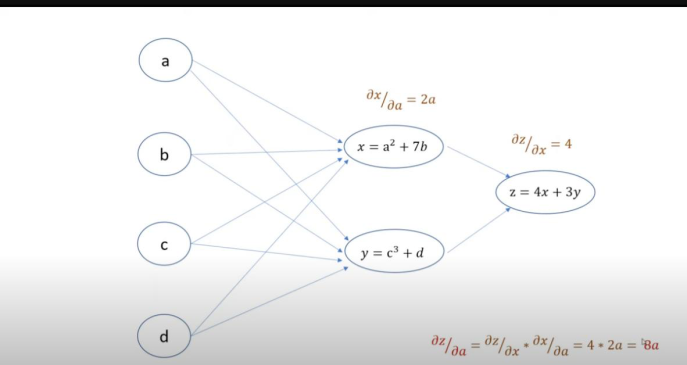

Figure 2: Chain rule (L is the number of layers/neurons; subscript 0 in C indicates the cost of a single training example; same principle can be applied to adjust the bias by replacing w with b)

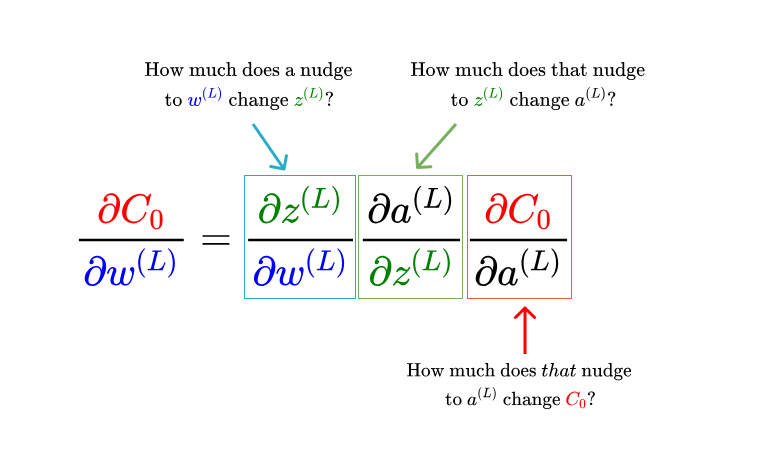

Figure 3: Computing the cost of all training data

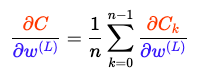

Figure 4: Final output -- a gradient vector that contains the gradients of the loss function with respect to all the weights and biases in the neural network

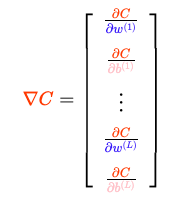

In [ ]:
# Simple implementation
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data (X: inputs, y: outputs)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR problem

# Initialize weights with random values
np.random.seed(0)  # For reproducibility
weights_input_hidden = np.random.rand(2, 2)  # 2 inputs to 2 hidden neurons
weights_hidden_output = np.random.rand(2, 1)  # 2 hidden neurons to 1 output
learning_rate = 1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)  # weighted sum of inputs for the hidden layer
    hidden_layer_output = sigmoid(hidden_layer_input)  # apply activation function to the above weighted sum
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) # prepare input for activation function
    y_pred = sigmoid(output_layer_input)  # calculate predictions by passing input into activation function

    # Calculate the error
    error = y - y_pred

    # Backward pass
    output_gradient = error * sigmoid_derivative(y_pred)  # calculate derivative of loss function with respect to y_pred
    hidden_error = output_gradient.dot(weights_hidden_output.T)
    hidden_gradient = hidden_error * sigmoid_derivative(hidden_layer_output)  # calculate hidden gradient

    # Update output layer weights
    weights_hidden_output += hidden_layer_output.T.dot(output_gradient) * learning_rate

    # Update hidden layer weights
    weights_input_hidden += X.T.dot(hidden_gradient) * learning_rate

# Output predictions after training
print("Predicted outputs after training:")
print(y_pred)

Predicted outputs after training:
[[0.99980116]
 [0.99999564]
 [0.99999652]
 [0.9999997 ]]


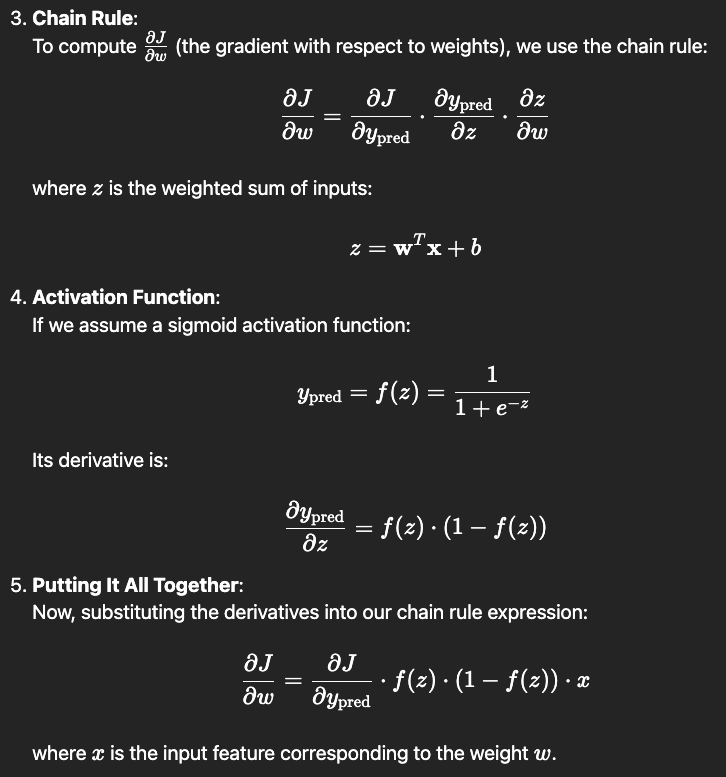

- Essentially, backpropagation provides the necessary information for gradient descent to optimize the network's performance.

## 4. Activation Functions ##

- Activation functions help map input values to a known range, which helps stabilize training and helps map values to a desired output in the last layer. It non-linearity into the model, which allows the network to learn complex patterns in the data.

### 1. Step Function

- **Definition**: The step function outputs a binary value (0 or 1) based on whether the input is below or above a certain threshold.

$$
f(x) =
\begin{cases}
0 & \text{if } x < 0 \\
1 & \text{if } x \geq 0
\end{cases}
$$

- **Pros**: Simple and easy to implement.
- **Cons**: Not differentiable, which makes it unsuitable for gradient-based optimization methods.

### 2. Sigmoid Function

- **Definition**: The sigmoid function squashes input values to a range between 0 and 1, making it useful for binary classification problems.

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

- **Pros**: Smooth gradient, outputs are bounded between 0 and 1, which can be interpreted as probabilities.
- **Cons**: Can cause vanishing gradients for large positive or negative inputs (outputs saturate), leading to slow convergence.

### 3. Hyperbolic Tangent (tanh)

- **Definition**: The tanh function is similar to the sigmoid but outputs values between -1 and 1.

$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- **Pros**: Zero-centered (outputs are between -1 and 1), which can help with convergence.
- **Cons**: Still suffers from vanishing gradients for large input values, but less so than the sigmoid function.

### 4. ReLU (Rectified Linear Unit)

- **Definition**: The ReLU function outputs the input directly if it is positive; otherwise, it outputs zero.

$$
  f(x) = \max(0, x)
$$

- **Pros**: Computationally efficient, helps mitigate the vanishing gradient problem, and allows for faster convergence.
- **Cons**: Can lead to "dying ReLU" problem, where neurons can become inactive (output zero) for all inputs.

### 5. Leaky ReLU

- **Definition**: A variation of ReLU that allows a small, non-zero, constant gradient when the input is negative.

$$
f(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

where alpha is a small constant.
- **Pros**: Helps prevent the dying ReLU problem by allowing a small gradient for negative inputs, maintaining some flow of information.
- **Cons**: Still not as popular as ReLU, and the choice of \( \alpha \) can affect performance.

## 6. Softmax ##

- **Definition**: The softmax function converts a vector of raw scores (logits) into a probability distribution over multiple classes, ensuring outputs are non-negative and sum to 1.

$$
p_i = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

- **Pros**: Provides a probabilistic interpretation of outputs, works well with cross-entropy loss, and is ideal for multi-class classification. Softmax emphasizes larger values in the input vector, making the highest value dominate the output probabilities (amplifies values)
- **Cons**: Sensitive to large inputs (can cause numerical instability), assumes mutual exclusivity between classes, and is not suitable for multi-label classification.


**More tips**
- Use sigmoid in output layer. All other places try to use tanh
- For hidden layers if you are not sure which activation function to use, just use ReLU as your default choice

In [ ]:
# Simple implementation
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def relu(x):
    return max(0,x)

def leaky_relu(x):
    return max(0.1*x,x)

def softmax(z):
    # Subtract the max value for numerical stability
    max_z = max(z)
    exp_values = [math.exp(z_i - max_z) for z_i in z]  # Exponentiate each value
    sum_exp = sum(exp_values)  # Sum of all exponentiated values
    probabilities = [exp_value / sum_exp for exp_value in exp_values]  # Normalize
    return probabilities

# Example usage
logits = [2.0, 1.0, 0.1]
probabilities = softmax(logits)
print("Softmax probabilities:", probabilities)

## 5. Cost Functions ##

- Cost function measures the performance of a machine learning model for given data. It is essential for evaluating and improving our models.

  * 1. Mean Absolute Error (MAE): the average of the absolute differences between predicted and actual values; provides a straightforward measure of error magnitude

  $$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

  * 2. Mean Sqaured Error (MSE): the average of the squared differences between predicted and actual values; penalizes larger errors more heavily, useful when large errors are particularly undesirable.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

  * 3. Root Mean Squared Error (RMSE): provides error in the same units as the target variable, making it easier to interpret

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

  * 4. R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variables; indicates the goodness of fit of the model

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

  * 5. Cross-Entropy: A measure of the difference between two probability distributions; quantifies the performance of a classification model by comparing predicted probabilities with actual class labels. A lower cross-entropy indicates better model performance.

For binary classification:

$$
\text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

For multi-class classification:

$$
\text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic})
$$

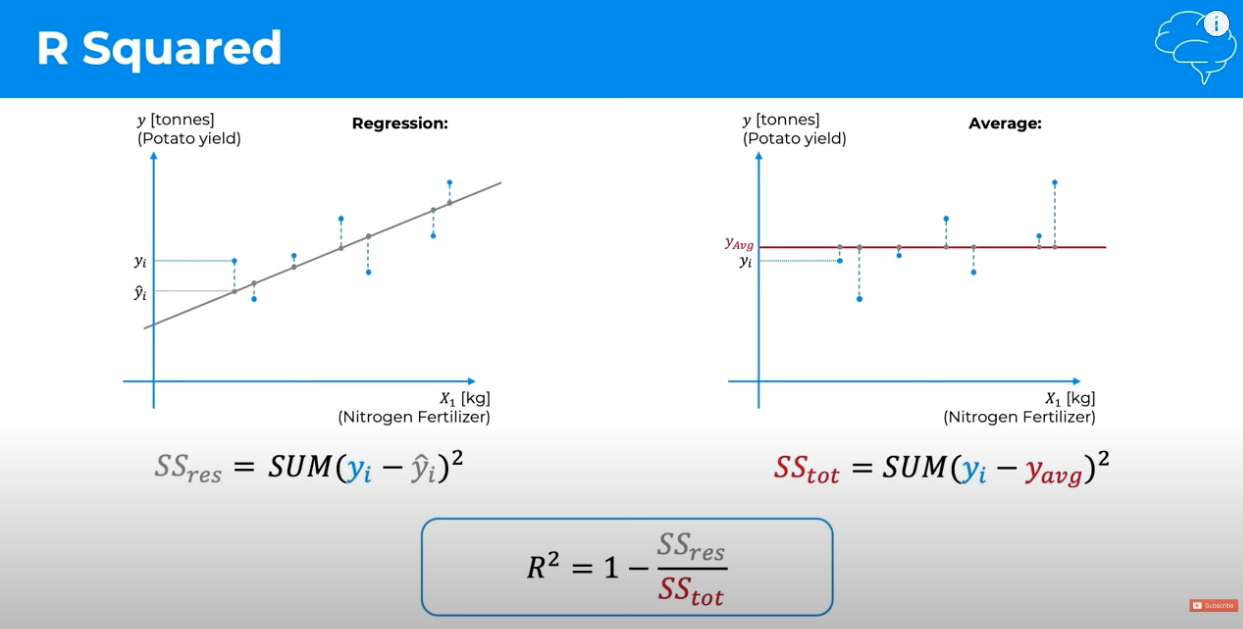

In [ ]:
# Simple Implementation
import numpy as np

# Sample data
y_true_regression = np.array([3.0, -0.5, 2.0, 7.0])  # Actual values for regression
y_pred_regression = np.array([2.5, 0.0, 2.0, 8.0])    # Predicted values for regression

y_true_classification = np.array([1, 0, 1, 1])          # Actual binary class labels
y_pred_classification = np.array([0.9, 0.1, 0.8, 0.6])  # Predicted probabilities

# 1. Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae = mean_absolute_error(y_true_regression, y_pred_regression)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_true_regression, y_pred_regression)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse = root_mean_squared_error(y_true_regression, y_pred_regression)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. R-squared (Coefficient of Determination)
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r_squared(y_true_regression, y_pred_regression)
print(f'R-squared: {r2}')

# 5. Cross-Entropy / Log Loss
def cross_entropy(y_true, y_pred):
    # Clip predicted probabilities to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

log_loss = cross_entropy(y_true_classification, y_pred_classification)
print(f'Cross-Entropy / Log Loss: {log_loss}')

Mean Absolute Error (MAE): 0.5
Mean Squared Error (MSE): 0.375
Root Mean Squared Error (RMSE): 0.6123724356957945
R-squared: 0.9486081370449679
Cross-Entropy / Log Loss: 0.23617255159896325


## 6. Regularization techniques

### 1. Weight regularization (L1 and L2 regularization):
- Adds a penalty term to the loss function based on the magnitude of the weights; discourages the model from learning overly complex patterns, which can lead to overfitting (refer to machine learning.ipynb for more)

### 2. Early Stopping:
- Monitors the model's performance on a validation set during training and stops the training process when the validation error starts to increasee

#### **How It Works**:
- During training, the validation loss is tracked.
- If the validation loss does not improve for a specified number of epochs (patience), training is stopped.
- The model weights are restored to the point where the validation loss was the lowest.

#### **Advantages**:
- Prevents the model from overfitting by stopping training before it memorizes the training data.
- Simple to implement and computationally efficient.

#### **Disadvantages**:
- Requires a validation set, which reduces the amount of data available for training.

### 3.  Dropout and Gaussian Noise

- Intuitive explanation: involves randomly ignoring or "dropping out" some layer outputs during training, used in deep neural networks to prevent overfitting.

- Mechanism: Randomly deactivates a fraction of neurons during each training iteration, forcing the network to learn robust features.

#### **How It Works**:
- During training, each neuron is dropped (set to zero) with probability \(p\) (dropout rate).
- The outputs of the remaining neurons are scaled by \(1 / (1 - p)\) to maintain the expected value.
- During inference, all neurons are active, and no dropout is applied.

#### **Advantages**:
- Prevents overfitting by reducing co-adaptation of neurons.
- Acts as a form of ensemble learning by training multiple subnetworks.

#### **Disadvantages**:
- Increases training time due to the randomness introduced.
- Requires careful tuning of the dropout rate \(p\).

- https://www.datacamp.com/tutorial/dropout-regularization-using-pytorch-guide

### 4. **Gaussian Noise**

- Adds random noise to the inputs or hidden layers during training.

#### **How It Works**:
- Noise is sampled from a Gaussian distribution with mean 0 and a small standard deviation.
- The noise is added to the input data or activations of hidden layers.

#### **Advantages**:
- Makes the model less sensitive to specific features, improving generalization.
- Acts as a form of data augmentation.

#### **Disadvantages**:
- Can slow down training if too much noise is added.
- Requires tuning of the noise level.

### 5. **Batch Normalization**

- Normalizes the inputs of each layer by adjusting and scaling the activations.
- https://www.geeksforgeeks.org/batch-normalization-implementation-in-pytorch/

#### **How It Works**:
- During training, the mean and variance of each mini-batch are computed and used to normalize the activations.
- The normalized activations are scaled and shifted using learnable parameters (gamma and beta).
- During inference, population statistics (running averages) are used instead of mini-batch statistics.

#### **Advantages**:
- Improves training stability and speeds up convergence.
- Has a slight regularization effect due to the noise introduced by mini-batch statistics.

#### **Disadvantages**:
- Not primarily designed to prevent overfitting.
- Can be less effective with very small batch sizes.

---

### Summary of Techniques

| **Technique**           | **Purpose**                                                                 | **Key Idea**                                                                 |
|--------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Weight Regularization**| Prevent overfitting                                                        | Penalize large weights (L1 or L2).                                           |
| **Early Stopping**       | Stop training before overfitting                                           | Monitor validation loss and stop when it increases.                          |
| **Dropout**              | Prevent overfitting                                                        | Randomly deactivate neurons during training.                                 |
| **Gaussian Noise**       | Improve generalization                                                     | Add noise to inputs or hidden layers.                                        |
| **Batch Normalization**  | Improve training stability and speed                                       | Normalize layer inputs using mini-batch statistics.                          |
| **Weight Decay**         | Prevent overfitting                                                        | Add L2 penalty to weights during optimization.                               |



In [ ]:
import numpy as np

# Example data
X_train = np.array([[1.0], [2.0], [3.0]])
# Define noise parameters
mean = 0
std_dev = 0.1

# Add Gaussian noise
noise = np.random.normal(mean, std_dev, X_train.shape)
X_train_noisy = X_train + noise

## 7. Learning rate and convergence ##

- Convergence refers to the point during the training of a machine learning model where the error (or loss) stabilizes, and further training does not significantly improve the model's performance.

- By θ = θ - α∇J(θ), gradient ∇J(θ) becomes 0 (slope of tangent to the curve is horizontal) at local minimum. This means the parameters θ stop updating, and the model's predictions no longer improve. Further training iterations do not reduce the loss.

- Plot the training loss and validation loss over epochs to monitor convergence.
Look for signs of overfitting (e.g., training loss decreases while validation loss* increases) or underfitting (e.g., both losses remain high).

  \* Validation loss is a measure of how well a machine learning model is performing on a separate dataset called the validation set. Also, evaluation/test loss is a measure of the model's performance on a completely separate dataset that it has never seen before, known as the test set.

- To improve convergence, we can use various techniques:

  - Learning Rate Scheduling: Use techniques like learning rate decay or adaptive learning rates (e.g., Adam optimizer)

  - Momentum: Add momentum to gradient descent to help escape local minima and saddle points.

  - Batch Normalization: Normalize inputs to each layer to stabilize training

  - Early Stopping: Stop training when the validation loss stops improving to prevent overfitting


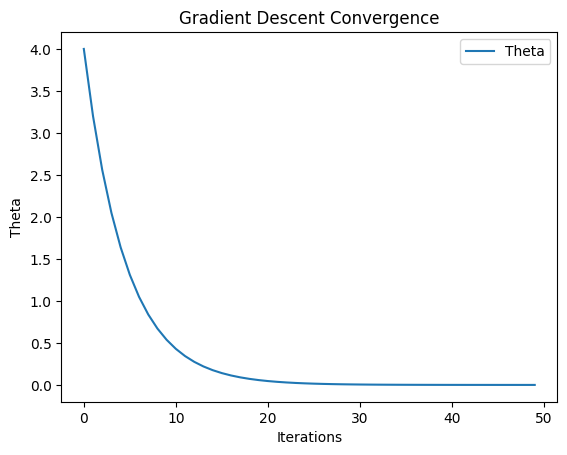

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic loss function: J(theta) = theta^2
def loss(theta):
    return theta**2

# Gradient of the loss function: dJ/dtheta = 2*theta
def gradient(theta):
    return 2*theta

# Gradient descent
theta = 4.0  # Initial guess
alpha = 0.1  # Learning rate
iterations = 50
history = []

for i in range(iterations):
    history.append(theta)
    theta = theta - alpha * gradient(theta)  # Update rule

# Plot convergence
plt.plot(history, label="Theta")
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

- Learning rate is a hyperparameter that determines the size of the steps taken toward the minimum of the loss function during optimization

- Step Size: The learning rate controls how much to update the model's weights in response to the gradient of the loss function. A small learning rate means smaller updates (requires a lot of iterations), while a larger learning rate results in bigger updates (may overshoot the minimum, leading to divergence or oscillation)

- Both learning rate decay and adaptive learning rates (see below) are strategies designed to help find an optimal learning rate for training models more effectively

- Experimentation (trial and error):

  1. Choose a range of values of alpha (e.g. 0.001, 0.01, 0.1, 1)
  2. Implement gradient descent for each learning rate in the range
  3. Plot the value of cost function against the number of iterations. Look out for the plot that converges to the minimum in the shortest number of iterations
  4. Redefine (narrow down) the range and try to pinpoint the optimal value

## 8. Weight Initialization ##

In [1]:
import torch
x = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)
y = x.mean()
y.backward()
print(x.grad)


tensor([0.3333, 0.3333, 0.3333])
